<a href="https://colab.research.google.com/github/Tmmfaris/TestGibTm/blob/main/CaseStudy_on_Supervised_Learning(16_01_26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Library

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.neighbors import KNeighborsClassifier # for K-NN
from sklearn.naive_bayes import GaussianNB # for Naive Baye's
from sklearn.tree import DecisionTreeClassifier # for Decision Tree
from sklearn.svm import SVC #svm
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

##Dataset Loading

In [120]:
# connecting out google drive onto the virtual machine
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Load Training Dataset

In [121]:
filepath = '/content/drive/MyDrive/DSA ICT Data Science/Data/CaseStudy/Training_data.csv'

train_df = pd.read_csv(filepath)
print("Train shape:", train_df.shape)
train_df.head()

Train shape: (5634, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


## 1. Exploratory Data Analysis (EDA):

In [122]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


###Drop unwanted column

In [123]:
train_df.drop(columns=['customerID'],inplace=True,axis=1)

###Check null values

In [124]:
train_df.isna().sum()

,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169
OnlineBackup,0


In [125]:
train_df.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [126]:
cat_cols = train_df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(train_df[col].value_counts(dropna=False))

print("Categorical columns:\n", cat_cols)


Column: gender
gender
Male      2744
Female    2721
NaN        169
Name: count, dtype: int64

Column: Partner
Partner
No     2890
Yes    2744
Name: count, dtype: int64

Column: Dependents
Dependents
No     3960
Yes    1674
Name: count, dtype: int64

Column: PhoneService
PhoneService
Yes    5081
No      553
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No                  2701
Yes                 2380
No phone service     553
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    2486
DSL            1945
No             1203
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No                     2720
Yes                    1574
No internet service    1171
NaN                     169
Name: count, dtype: int64

Column: OnlineBackup
OnlineBackup
No                     2459
Yes                    1972
No internet service    1203
Name: count, dtype: int64

Column: DeviceProtection
DeviceProtection
No                     2485
Yes    

In [127]:
train_df['MultipleLines']=train_df['MultipleLines'].replace('No phone service','No')

In [128]:
internet_dependent_cols = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]
for col in internet_dependent_cols:
    train_df[col] = train_df[col].replace('No internet service', 'No')
train_df['StreamingTV'].value_counts()

,count
StreamingTV,
No,3447
Yes,2187


###Check Duplicates

In [129]:
train_df.duplicated().sum()

np.int64(8)

In [130]:
train_df.drop_duplicates(inplace=True)
train_df.reset_index(drop=True, inplace=True)

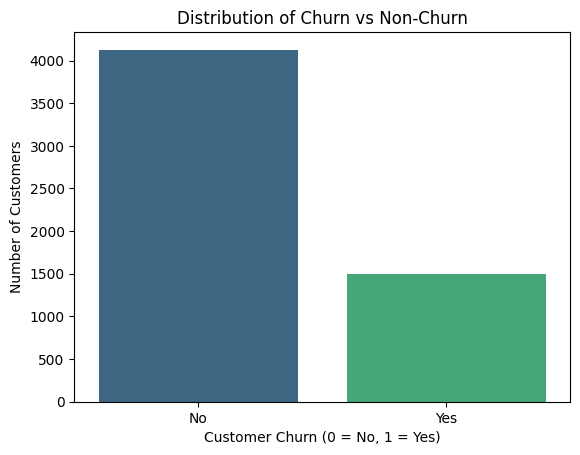

In [131]:
sns.countplot(data=train_df, x='Churn', hue='Churn', palette='viridis', legend=False)

plt.title('Distribution of Churn vs Non-Churn')
plt.xlabel('Customer Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')

plt.show()

In [132]:
# value cannot be converted to a number and replace it with NaN
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')
train_df['TotalCharges'].isna().sum()

np.int64(290)

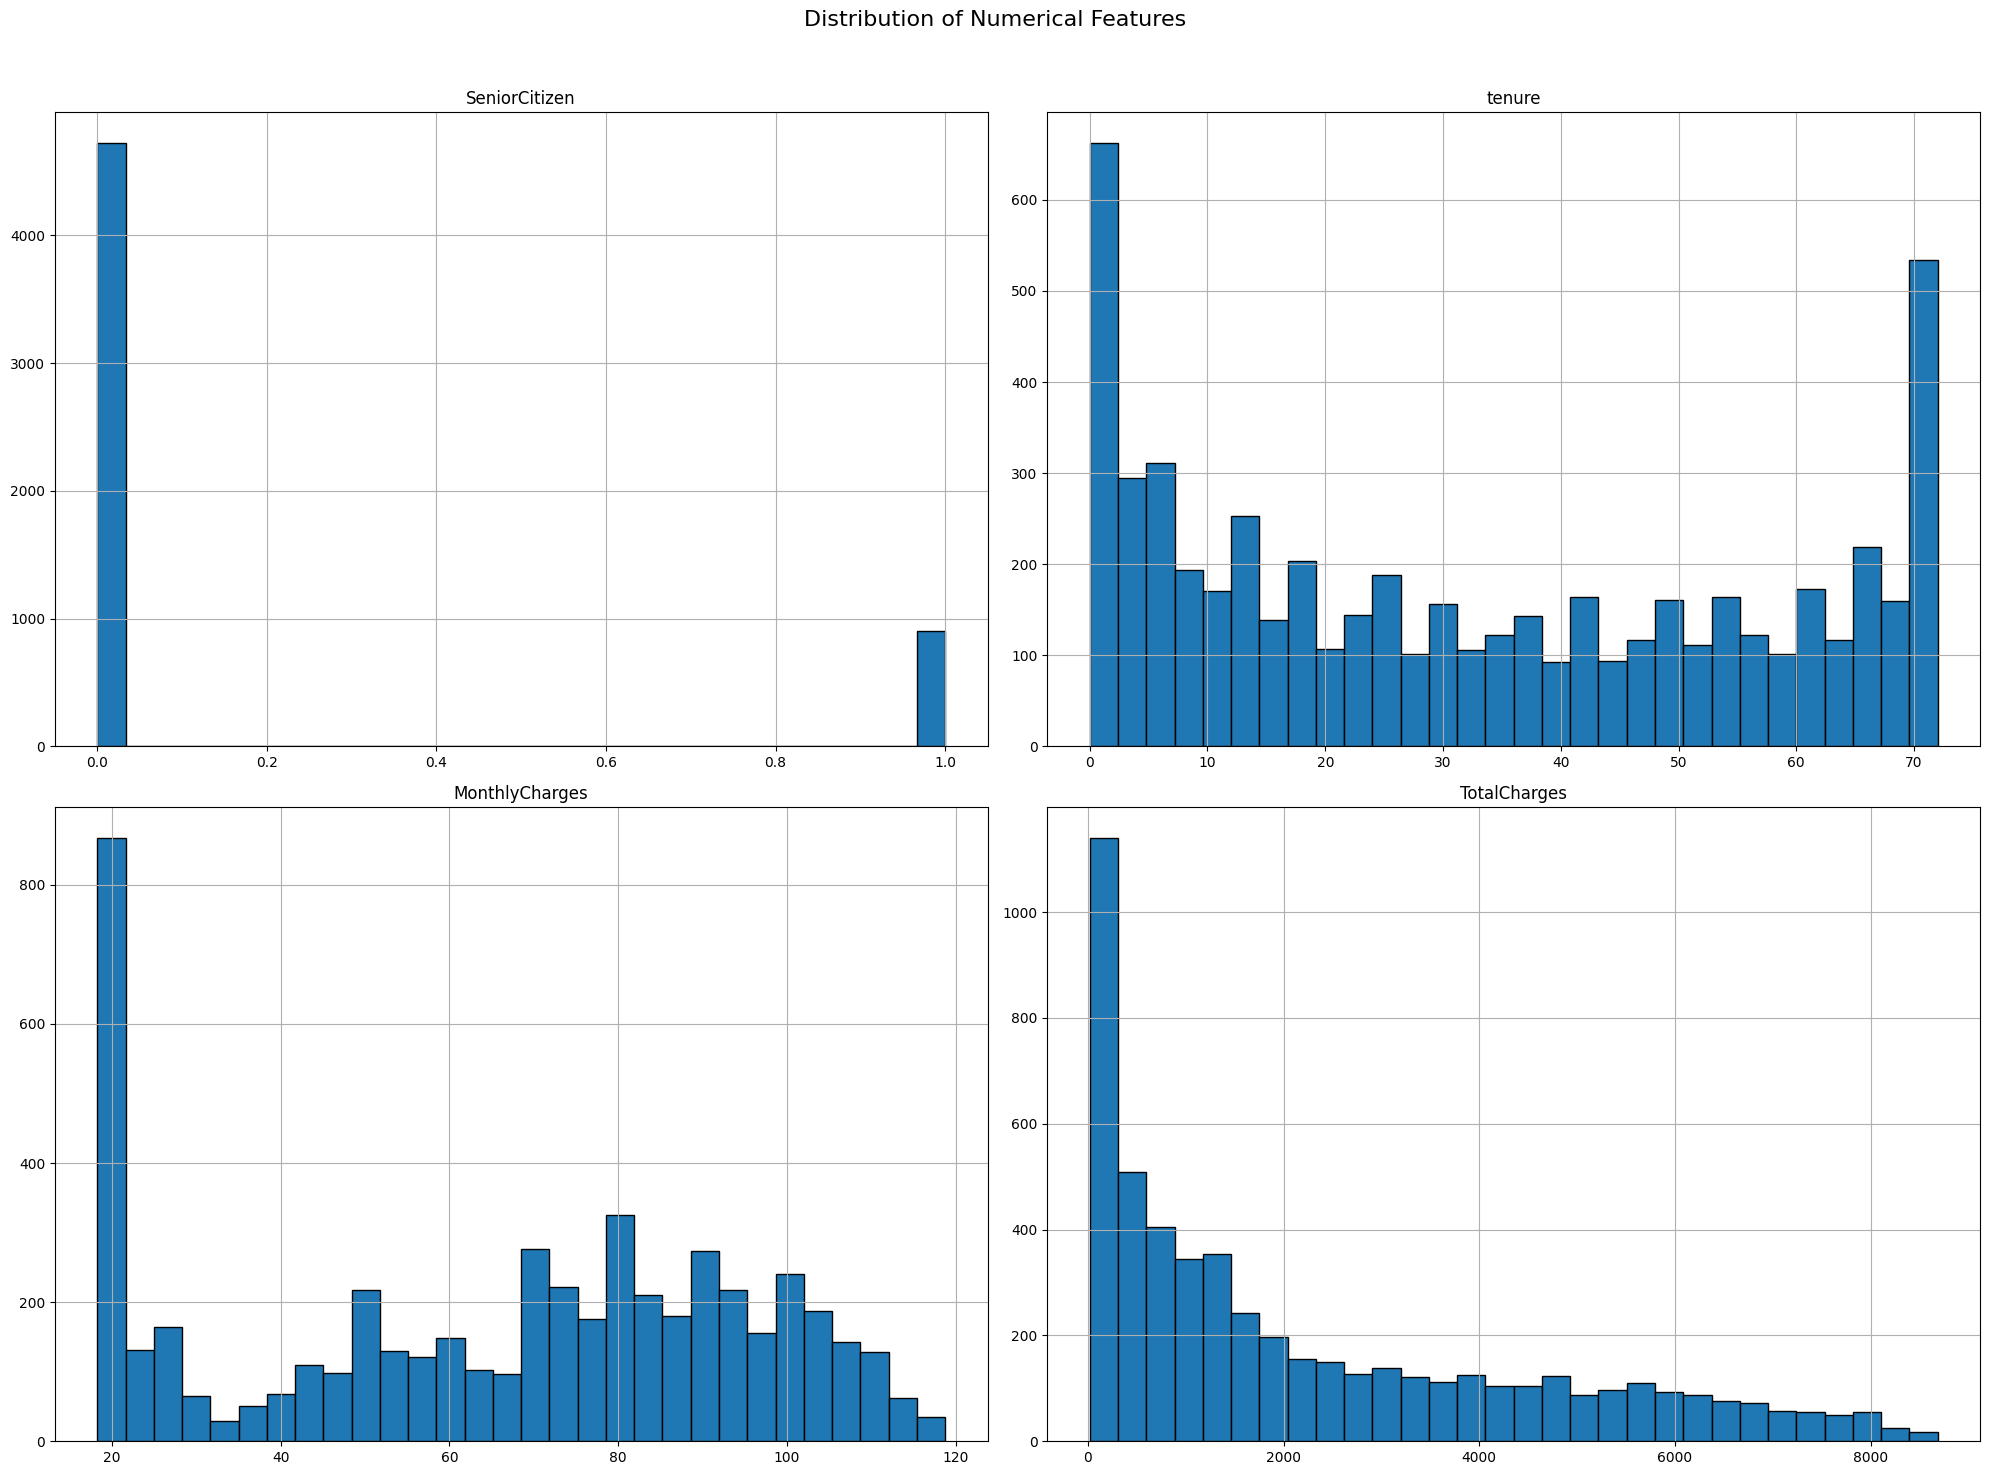

In [133]:
# Select numerical columns
freqgraph = train_df.select_dtypes(include='number')

# Plot histograms
freqgraph.hist(figsize=(20, 15), bins=30, edgecolor='black')

# Overall title
plt.suptitle('Distribution of Numerical Features', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

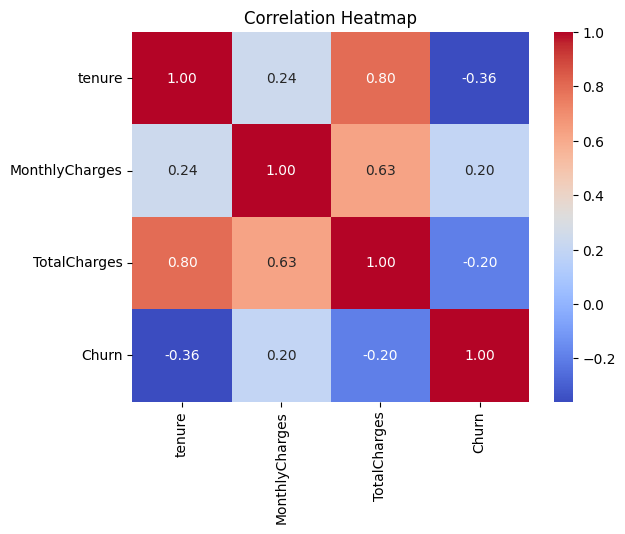

In [134]:

# Copy dataset for correlation analysis
df_corr = train_df.copy()

# Encode target variable
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# Convert TotalCharges to numeric (handle blanks)
df_corr['TotalCharges'] = pd.to_numeric(
    df_corr['TotalCharges'],
    errors='coerce'
)

# Handle missing values after conversion
df_corr['TotalCharges'] = df_corr['TotalCharges'].fillna(
    df_corr['TotalCharges'].median()
)

# Compute correlation matrix
corr_matrix = df_corr[
    ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##Preprocessing

###Step1: Missing Values - Filling and Removing

In [135]:
# Drop gender-null rows correctly
train_df = train_df.dropna(subset=['gender','OnlineSecurity']).reset_index(drop=True)

# Sanity check
print("Train shape:", train_df.shape)

Train shape: (5292, 20)


In [136]:
train_df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [137]:
num_cols = ['MonthlyCharges', 'TotalCharges']

for col in num_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())

In [138]:
#converting target column from yes/no to 0/1
train_df['Churn'] = train_df['Churn'].map({'Yes': 1, 'No': 0})
train_df['Churn'].value_counts()

,count
Churn,
0,3877
1,1415


In [139]:
train_df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [140]:
print("Train shape:", train_df.shape)

Train shape: (5292, 20)


###Step2: Outlier Detection - IQR

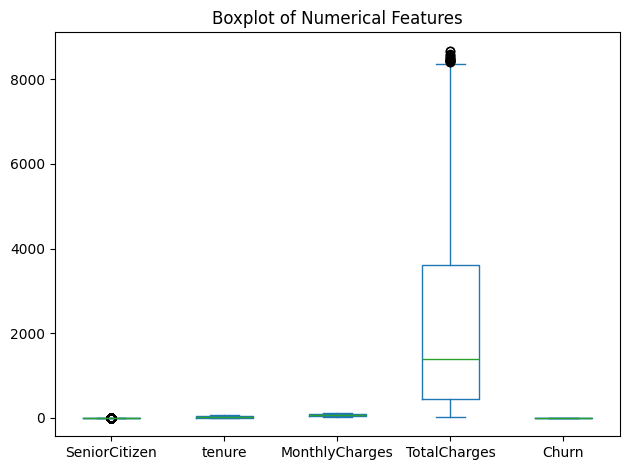

In [141]:
num_cols = train_df.select_dtypes(include='number')

# Create boxplot
num_cols.plot(kind='box')

# Formatting
plt.title('Boxplot of Numerical Features')
plt.tight_layout()

plt.show()

In [142]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((train_df[col] < lower) | (train_df[col] > upper)).sum()

    if outlier_count > 0:
        print(col, "=", outlier_count, "outliers")
        print(f"  Lower Bound: {lower}")
        print(f"  Upper Bound: {upper}")

        # clip function to set the value in range between lower and upper bound
        train_df[col] = train_df[col].clip(lower=lower, upper=upper)

TotalCharges = 17 outliers
  Lower Bound: -4294.59375
  Upper Bound: 8364.75625


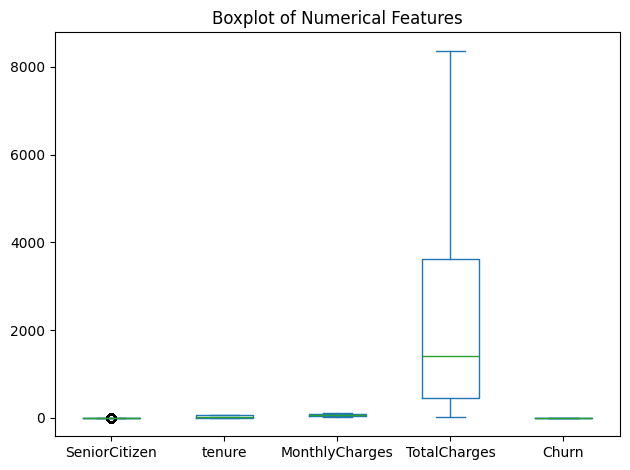

In [143]:
# Select only numerical columns
num_cols = train_df.select_dtypes(include='number')

# Create boxplot
num_cols.plot(kind='box')

# Formatting
plt.title('Boxplot of Numerical Features')
plt.tight_layout()

plt.show()

In [144]:
train_df_corr = train_df.select_dtypes(include=['number'])
corr = train_df_corr.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.018880,0.202131,0.098688,0.153176
tenure,0.018880,1.000000,0.229168,0.796253,-0.358481
MonthlyCharges,0.202131,0.229168,1.000000,0.606041,0.193229
TotalCharges,0.098688,0.796253,0.606041,1.000000,-0.196726
Churn,0.153176,-0.358481,0.193229,-0.196726,1.000000


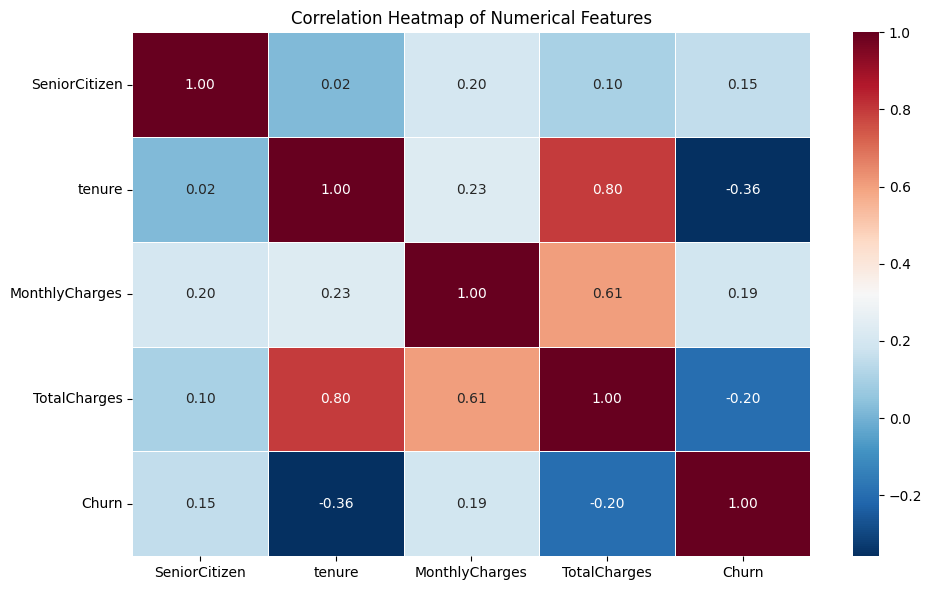

In [145]:
plt.figure(figsize=(10, 6))

sns.heatmap(
    corr,
    annot=True,
    cmap='RdBu_r',
    fmt='.2f',
    linewidths=0.5
)

plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

##3. Feature Engineering:

Adding more features in existing dataset

###Customer Lifetime Value (CLV)

In [146]:
# Customer Lifetime Value
train_df['CLV'] = train_df['tenure'] * train_df['MonthlyCharges']

###Tenure Grouping

In [147]:
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 Year'
    elif tenure <= 24:
        return '1-2 Years'
    else:
        return '2+ Years'

train_df['TenureGroup'] = train_df['tenure'].apply(tenure_group)

###Contract - Tenure Relation

In [148]:
# Create a numeric mapping for Contract if not already done
# Month-to-month: 1, One year: 12, Two year: 24
train_df['Contract_Months'] = train_df['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two year': 24})

# Interaction Feature
train_df['Tenure_Contract_Interaction'] = train_df['tenure'] * train_df['Contract_Months']

In [149]:
train_df[['CLV','TenureGroup','Contract_Months','Tenure_Contract_Interaction']].head()

,CLV,TenureGroup,Contract_Months,Tenure_Contract_Interaction
0,726.25,2+ Years,12,420
1,1001.00,2+ Years,1,28
2,5521.60,2+ Years,1,56
3,797.55,2+ Years,24,936
4,4149.60,2+ Years,1,39


In [150]:
train_df.dtypes.value_counts()

,count
object,16
int64,5
float64,3


In [151]:
train_df.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,2
InternetService,3
OnlineSecurity,2
OnlineBackup,2


###Encoding

In [152]:
OneHot_col=['gender','PaymentMethod','Contract','StreamingMovies','StreamingTV','TechSupport','DeviceProtection','OnlineBackup','OnlineSecurity','InternetService','MultipleLines', 'TenureGroup']
LE_cols=['Partner','Dependents','PhoneService','PaperlessBilling']

In [153]:
#one-Hot encoding
train_df= pd.get_dummies(train_df, columns= OneHot_col, drop_first=True,dtype=int)

In [154]:
# Label Encoding

le= LabelEncoder()
for col in LE_cols:
  if col in train_df.columns:
    train_df[col]=le.fit_transform(train_df[col])
train_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,CLV,...,StreamingTV_Yes,TechSupport_Yes,DeviceProtection_Yes,OnlineBackup_Yes,OnlineSecurity_Yes,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TenureGroup_1-2 Years,TenureGroup_2+ Years
0,0,0,0,35,1,0,20.75,700.45,0,726.25,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,28,0,1,35.75,961.40,0,1001.00,...,0,1,1,0,0,0,0,0,0,1
2,0,0,0,56,1,0,98.60,5581.05,0,5521.60,...,1,0,0,1,0,1,0,1,0,1
3,0,1,0,39,1,1,20.45,790.00,0,797.55,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,39,1,1,106.40,4040.65,0,4149.60,...,1,0,0,1,1,1,0,1,0,1


In [155]:
train_df.shape

(5292, 29)

###Feature Selection

In [156]:
#If a feature has the same value for 99% of your customers it provides no predictive power.
# This removes features that have the same value in more than 99% of samples
selector = VarianceThreshold(threshold=0.01)
selector.fit(train_df)

# Get the remaining columns
selected_cols = train_df.columns[selector.get_support()]
train_df = train_df[selected_cols]

###Correlation Check

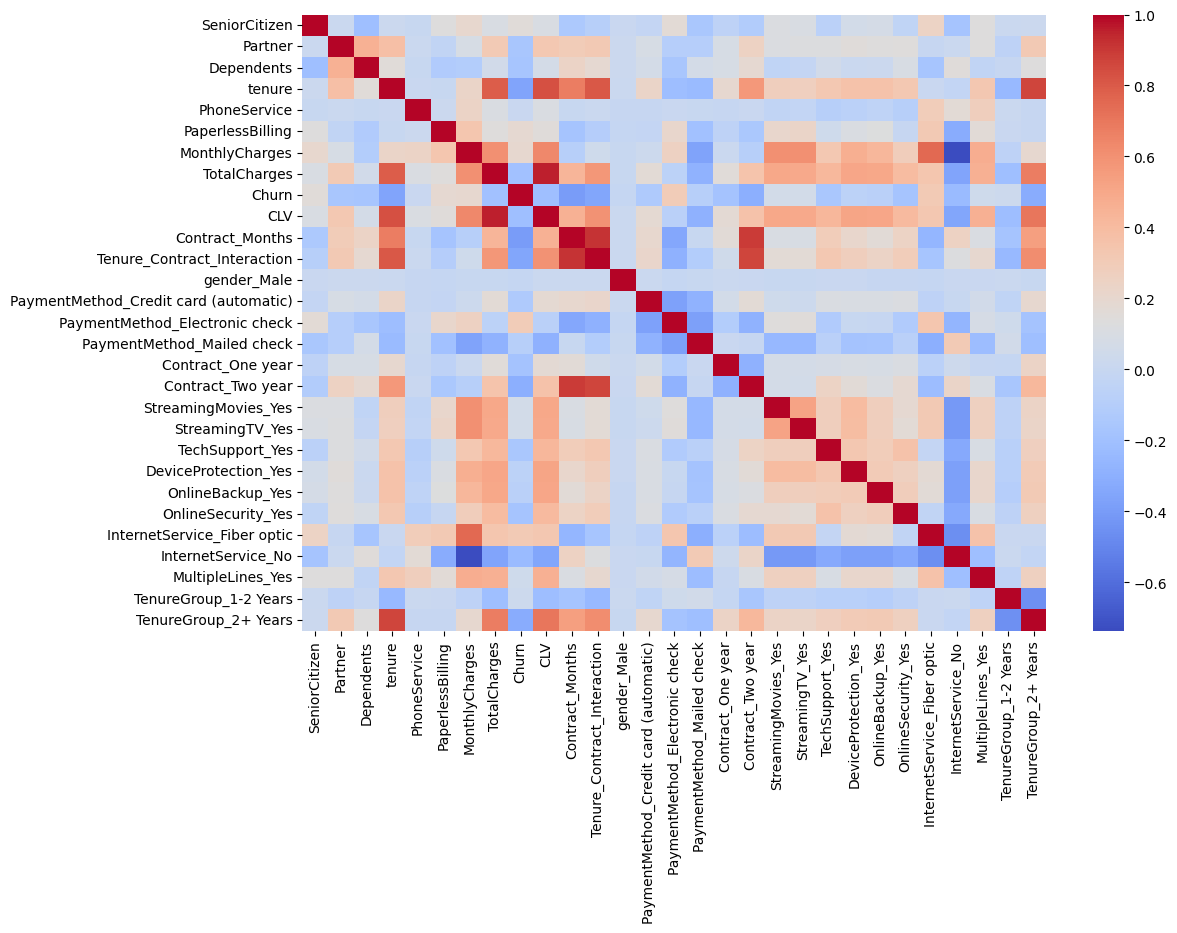

In [157]:
plt.figure(figsize=(12, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

In [158]:
service_cols = [
    'MultipleLines_Yes','OnlineSecurity_Yes','OnlineBackup_Yes',
    'DeviceProtection_Yes','TechSupport_Yes',
    'StreamingTV_Yes','StreamingMovies_Yes'
]

train_df['TotalServices'] = train_df[service_cols].sum(axis=1)
numerical=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges','TotalServices']

###Scailing

In [159]:
corr = train_df.corr()['Churn'].sort_values(ascending=False)
corr

,Churn
Churn,1.000000
InternetService_Fiber optic,0.312948
PaymentMethod_Electronic check,0.300422
MonthlyCharges,0.193229
PaperlessBilling,0.192867
SeniorCitizen,0.153176
StreamingTV_Yes,0.063701
StreamingMovies_Yes,0.059147
MultipleLines_Yes,0.040853
TenureGroup_1-2 Years,0.028812


In [160]:
# Create the correlation matrix
corr_matrix = train_df.corr().abs()

# Select the upper triangle (to avoid duplicate pairs like A-B and B-A)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.85
high_corr = [(column, row, upper[column][row])
             for column in upper.columns
             for row in upper.index
             if upper[column][row] > 0.85]

print("Highly Correlated Pairs (> 0.85):")
for pair in high_corr:
    print(f"{pair[0]} & {pair[1]}: {pair[2]:.2f}")

Highly Correlated Pairs (> 0.85):
CLV & TotalCharges: 0.95
Tenure_Contract_Interaction & Contract_Months: 0.92
Contract_Two year & Contract_Months: 0.90
Contract_Two year & Tenure_Contract_Interaction: 0.87
TenureGroup_2+ Years & tenure: 0.87


In [161]:
# List of columns to drop based on your high correlation results
to_drop = ['TotalCharges', 'Contract_Months', 'Contract_Two year']

# Update your dataframe
train_df_final = train_df.drop(columns=to_drop)

print(f"Features remaining: {len(train_df_final.columns)}")
print(train_df_final.columns)

Features remaining: 27
Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'Churn', 'CLV',
       'Tenure_Contract_Interaction', 'gender_Male',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'StreamingMovies_Yes', 'StreamingTV_Yes',
       'TechSupport_Yes', 'DeviceProtection_Yes', 'OnlineBackup_Yes',
       'OnlineSecurity_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'TenureGroup_1-2 Years',
       'TenureGroup_2+ Years', 'TotalServices'],
      dtype='object')


In [162]:
train_df_final.shape

(5292, 27)

###Train-Test split

In [163]:
X = train_df_final.drop('Churn', axis=1)  # features
y = train_df_final['Churn']  # target

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [165]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4233, 26)
(1059, 26)
(4233,)
(1059,)


In [166]:
y_train.head()

,Churn
1209,0
5243,0
3036,1
1158,0
5203,0


##4. Model Development:

###Logistic Regression

In [167]:
# Step 1: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize Logistic Regression (balanced & convergent)
log_reg_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    solver='lbfgs'
)

# Step 3: Train the model
log_reg_model.fit(X_train_scaled, y_train)

# Step 4: Predict
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Step 5: Evaluate
Acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
prec_log_reg = precision_score(y_test, y_pred_log_reg)
Rec_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print("Accuracy Score :", Acc_log_reg)
print("Precision Score:", prec_log_reg)
print("Recall Score   :", Rec_log_reg)
print("F1 Score       :", f1_log_reg)

Accuracy Score : 0.76109537299339
Precision Score: 0.5296912114014252
Recall Score   : 0.802158273381295
F1 Score       : 0.6380543633762518


###Decision Tree

In [168]:
d_model=DecisionTreeClassifier()
d_model.fit(X_train,y_train)
#predict using trained Ml model
y_pred_dtree=d_model.predict(X_test)

In [169]:
#evaluate ml model
Acc_dtree=accuracy_score(y_test,y_pred_dtree)
prec_dtree=precision_score(y_test,y_pred_dtree)
rec_dtree=recall_score(y_test,y_pred_dtree)
f1_dtree=f1_score(y_test,y_pred_dtree)

print("Accuracy:",Acc_dtree)
print("Precision: ",prec_dtree)
print("Recall:",rec_dtree)
print("f1 score:",f1_dtree)

Accuracy: 0.71671388101983
Precision:  0.46153846153846156
Recall: 0.4748201438848921
f1 score: 0.46808510638297873


###Naive Baye's

In [170]:
#initializing the model
nb_model=GaussianNB()
#training model
nb_model.fit(X_train,y_train)
#predict using trained Ml model
y_pred_nb=nb_model.predict(X_test)

In [171]:
#evaluate ml model
Acc_nb=accuracy_score(y_test,y_pred_nb)
prec_nb=precision_score(y_test,y_pred_nb)
rec_nb=recall_score(y_test,y_pred_nb)
f1_nb=f1_score(y_test,y_pred_nb)

print("Accuracy:",Acc_nb)
print("Precision: ",prec_nb)
print("Recall:",rec_nb)
print("f1 score:",f1_nb)

Accuracy: 0.7695939565627951
Precision:  0.5420792079207921
Recall: 0.7877697841726619
f1 score: 0.6422287390029325


###KNN

In [172]:
accuracy_list = []
neighbors_range = np.arange(1,20)

for k in neighbors_range:
  classifier = KNeighborsClassifier(n_neighbors=k , metric='minkowski',p=2)  # initialising classifier for iteration using Euclidian p=2
  #Training the ML model
  classifier.fit(X_train, y_train)
  y_pred_knn=classifier.predict(X_test)  #predict using trained ML model
  acc = accuracy_score(y_test,y_pred_knn)  # evaluate the ML model
  accuracy_list.append(acc)

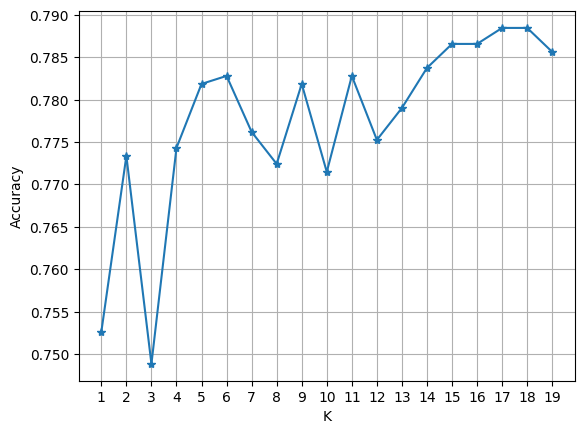

In [173]:
plt.plot(neighbors_range, accuracy_list,'*-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(neighbors_range)
plt.grid()

In [174]:
classifier_knn = KNeighborsClassifier(n_neighbors=12, metric='euclidean')
classifier_knn.fit(X_train,y_train)
y_pred_knn_eu = classifier_knn.predict(X_test)
acc_knn=accuracy_score(y_test,y_pred_knn_eu)
prec_knn=precision_score(y_test,y_pred_knn_eu)
rec_knn=recall_score(y_test,y_pred_knn_eu)
f1_knn=f1_score(y_test,y_pred_knn_eu)


print('Accuracy:',acc_knn)
print('Precision:',prec_knn)
print('Recall:',rec_knn)
print('F1 Score:',f1_knn)

Accuracy: 0.7752596789423984
Precision: 0.6219512195121951
Recall: 0.3669064748201439
F1 Score: 0.46153846153846156


###SVM

In [175]:
# # create SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True)
# # train model
svm_model.fit(X_train, y_train)
#  predict using trained ML model
y_pred_svm = svm_model.predict(X_test)

In [176]:
Acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("Accuracy:", Acc_svm)
print("Precision:", prec_svm)
print("Recall:", rec_svm)
print("F1 score:", f1_svm)

Accuracy: 0.6430594900849859
Precision: 0.41467576791808874
Recall: 0.8741007194244604
F1 score: 0.5625


###Model Performance and its comparison

In [177]:
results = pd.DataFrame({
    'Model': ['Decision Tree','Logistic Regression','Naive Bayes','SVM','KNN'],
    'Accuracy': [Acc_dtree,Acc_log_reg,Acc_nb,Acc_svm,acc_knn],
    'Precision': [prec_dtree,prec_log_reg,prec_nb,prec_svm,prec_knn],
    'Recall': [rec_dtree,Rec_log_reg,rec_nb,rec_svm,rec_knn],
    'F1 Score': [f1_dtree,f1_log_reg,f1_nb,f1_svm,f1_knn]
})

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.716714,0.461538,0.474820,0.468085
1,Logistic Regression,0.761095,0.529691,0.802158,0.638054
2,Naive Bayes,0.769594,0.542079,0.787770,0.642229
3,SVM,0.643059,0.414676,0.874101,0.562500
4,KNN,0.775260,0.621951,0.366906,0.461538


By compairing the models,we get an information that best performance was given by Logistic Regression

###Loading Test Data

In [178]:
test_df = pd.read_csv('/content/drive/MyDrive/DSA ICT Data Science/Data/CaseStudy/Testing_data.csv')

###Drop customerID

In [179]:
test_df= test_df.drop('customerID', axis=1)

###Handle Duplicates

In [180]:
test_df.drop_duplicates(inplace=True)
test_df.reset_index(drop=True, inplace=True)

Standardize 'MultipleLines' and Service-dependent columns

In [181]:
test_df['MultipleLines'] = test_df['MultipleLines'].replace('No phone service', 'No')
service_dependent_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
for col in service_dependent_cols:
    test_df[col] = test_df[col].replace('No internet service', 'No')

In [182]:
# Convert Churn to numerical
test_df['Churn'] = test_df['Churn'].map({'Yes': 1, 'No': 0})

In [183]:
# Convert TotalCharges to numeric and fill NaNs
test_df['TotalCharges'] = pd.to_numeric(test_df['TotalCharges'], errors='coerce')
test_df['TotalCharges'] = test_df['TotalCharges'].fillna(test_df['TotalCharges'].median())

In [184]:
print("Test data shape: ", test_df.shape)
print("Missing values aftern processing: ", test_df.isna().sum().sum())

Test data shape:  (1407, 20)
Missing values aftern processing:  0


###Feature Engineering for Test Dataset

In [185]:
# Customer Lifetime Value
test_df['CLV'] = test_df['tenure'] * test_df['MonthlyCharges']

# Tenure Grouping
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 Year'
    elif tenure <= 24:
        return '1-2 Years'
    else:
        return '2+ Years'
test_df['TenureGroup'] = test_df['tenure'].apply(tenure_group)

# Contract - Tenure Relation
test_df['Contract_Months'] = test_df['Contract'].map({'Month-to-month': 1, 'One year': 12, 'Two year': 24})
test_df['Tenure_Contract_Interaction'] = test_df['tenure'] * test_df['Contract_Months']

In [186]:
test_df.dtypes.value_counts()

,count
object,16
int64,5
float64,3


In [187]:
test_df.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,2
InternetService,3
OnlineSecurity,2
OnlineBackup,2


In [188]:
test_df.shape

(1407, 24)

###Encoding of Reprocessed Test Dataset

In [189]:
OneHot_col=['gender','PaymentMethod','Contract','StreamingMovies','StreamingTV','TechSupport','DeviceProtection','OnlineBackup','OnlineSecurity','InternetService','MultipleLines', 'TenureGroup']
LE_col=['Partner','Dependents','PhoneService','PaperlessBilling']

# Apply One-Hot Encoding
test_df = pd.get_dummies(test_df, columns=OneHot_col, drop_first=True, dtype=int)

# Apply Label Encoding
le = LabelEncoder()
for col in LE_col:
    if col in test_df.columns:
        test_df[col] = le.fit_transform(test_df[col])

test_df.shape

(1407, 29)

###Feature Selection and Scaling for Test Dataset

In [190]:
#If a feature has the same value for 99% of your customers it provides no predictive power.
# This removes features that have the same value in more than 99% of samples
selector = VarianceThreshold(threshold=0.01)
selector.fit(test_df)

# Get the remaining columns
selected_cols = test_df.columns[selector.get_support()]
test_df = test_df[selected_cols]

In [191]:
service_cols = [
    'MultipleLines_Yes','OnlineSecurity_Yes','OnlineBackup_Yes',
    'DeviceProtection_Yes','TechSupport_Yes',
    'StreamingTV_Yes','StreamingMovies_Yes'
]

test_df['TotalServices'] = test_df[service_cols].sum(axis=1)
numerical=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges','TotalServices']

###Scailing for test dataset

In [192]:
sscaler = StandardScaler()
test_df[numerical] = sscaler.fit_transform(test_df[numerical])

In [193]:
corr = train_df.corr()['Churn'].sort_values(ascending=False)

In [194]:
# Create the correlation matrix
corr_matrix = test_df.corr().abs()

# Select the upper triangle (to avoid duplicate pairs like A-B and B-A)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.85
high_corr = [(column, row, upper[column][row])
             for column in upper.columns
             for row in upper.index
             if upper[column][row] > 0.85]

print("Highly Correlated Pairs (> 0.85):")
for pair in high_corr:
    print(f"{pair[0]} & {pair[1]}: {pair[2]:.2f}")

Highly Correlated Pairs (> 0.85):
CLV & TotalCharges: 1.00
Tenure_Contract_Interaction & Contract_Months: 0.90
Contract_Two year & Contract_Months: 0.89
Contract_Two year & Tenure_Contract_Interaction: 0.85
TenureGroup_2+ Years & tenure: 0.86


In [195]:
# List of columns to drop based on your high correlation results
to_drop = ['TotalCharges', 'Contract_Months', 'Contract_Two year']

# Update your dataframe
test_df_final = test_df.drop(columns=to_drop)

print(f"Features remaining: {len(train_df_final.columns)}")
print(test_df_final.columns)

Features remaining: 27
Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'Churn', 'CLV',
       'Tenure_Contract_Interaction', 'gender_Male',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'StreamingMovies_Yes', 'StreamingTV_Yes',
       'TechSupport_Yes', 'DeviceProtection_Yes', 'OnlineBackup_Yes',
       'OnlineSecurity_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'TenureGroup_1-2 Years',
       'TenureGroup_2+ Years', 'TotalServices'],
      dtype='object')


In [196]:
test_df_final = test_df_final.drop(columns='Churn')
test_df_final.shape

(1407, 26)

In [197]:
test_df_final = test_df_final.reindex(
    columns=train_df_final.drop(columns='Churn').columns,
    fill_value=0
)

In [198]:
set(train_df_final.drop(columns='Churn').columns) == set(test_df_final.columns)

True

In [199]:
X_feautures = train_df_final.drop(columns=['Churn'])
y_target = train_df_final['Churn']

In [200]:
# Step 1: Define features and target
X_final = train_df.drop('Churn', axis=1)
y_final = train_df['Churn']

# Step 2: Scale features
X_final_scaled = scaler.fit_transform(X_final)

# Step 3: Initialize Logistic Regression
LR = LogisticRegression(
    max_iter=2000,
    random_state=42,
    class_weight='balanced'
)

# Step 4: Train final model
LR.fit(X_final_scaled, y_final)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=42)

In [201]:
X_train = train_df_final.drop(columns='Churn')
y_train = train_df_final['Churn']
X_test = test_df_final
y_test = test_df['Churn']

In [202]:
# Step 1: Feature Scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize Logistic Regression (balanced + convergent)
log_reg_model = LogisticRegression(
    max_iter=2000,
    random_state=42,
    class_weight='balanced',
    solver='lbfgs'
)

# Step 3: Train model
log_reg_model.fit(X_train_scaled, y_train)

# Step 4: Predict
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Step 5: Evaluate model
Acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
prec_log_reg = precision_score(y_test, y_pred_log_reg)
Rec_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print("Accuracy :", Acc_log_reg)
print("Precision:", prec_log_reg)
print("Recall   :", Rec_log_reg)
print("F1 Score :", f1_log_reg)

Accuracy : 0.5863539445628998
Precision: 0.3732558139534884
Recall   : 0.8818681318681318
F1 Score : 0.5245098039215687


##5. Model Fine-Tuning:

###GridSearchCV or RandomizedSearchCV to fine-tune hyperparameters

In [203]:
# 1. Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Strength of regularization (smaller = stronger)
    'penalty': ['l1', 'l2'],            # Type of regularization
    'solver': ['liblinear']             # Required for l1 penalty
}

# 2. Initialize GridSearchCV
# We use 'recall' as the scoring metric because catching churners is our priority
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='recall')

# 3. Fit to your training data
grid_search.fit(X_train, y_train)

# 4. Identify the best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [204]:
# Predict with the tuned model
y_pred_tuned = best_model.predict(X_test)

# Calculate new metrics
tuned_recall = recall_score(y_test, y_pred_tuned)
tuned_acc = accuracy_score(y_test, y_pred_tuned)

print(f"Original Recall: {Rec_log_reg:.4f} vs Tuned Recall: {tuned_recall:.4f}")
print(f"Original Accuracy: {Acc_log_reg:.4f} vs Tuned Accuracy: {tuned_acc:.4f}")

Original Recall: 0.8819 vs Tuned Recall: 0.9313
Original Accuracy: 0.5864 vs Tuned Accuracy: 0.4421
